# setup

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 9.2 MB/s eta 0:00:00


In [2]:
import pickle
import numpy as np

import umap
import matplotlib.pyplot as plt

# load weight mats

In [4]:
# Define the path to your pickle file in Google Drive
file_path = '/content/drive/MyDrive/ts-1L-21M_Wdec.pkl'  # Change the path if necessary

# Load the weight matrix from the pickle file
with open(file_path, 'rb') as f:
    weight_matrix_np = pickle.load(f)

# Optionally, check the shape of the loaded weight matrix
print(weight_matrix_np.shape)

torch.Size([16384, 1024])


In [5]:
weight_matrix_np = weight_matrix_np.detach().numpy()

In [6]:
# Define the path to your pickle file in Google Drive
file_path = '/content/drive/MyDrive/ts-2L-33M_Wdec.pkl'  # Change the path if necessary

# Load the weight matrix from the pickle file
with open(file_path, 'rb') as f:
    weight_matrix_2 = pickle.load(f)

# Optionally, check the shape of the loaded weight matrix
print(weight_matrix_2.shape)

torch.Size([16384, 1024])


In [7]:
weight_matrix_2 = weight_matrix_2.detach().numpy()

# load sae f actvs

In [ ]:
file_path = '/content/drive/MyDrive/fActs_ts_1L_21M_anySamps_v1.pkl'
with open(file_path, 'rb') as f:
    feature_acts_model_A = pickle.load(f)

In [ ]:
file_path = '/content/drive/MyDrive/fActs_ts_2L_33M_anySamps_v1.pkl'
with open(file_path, 'rb') as f:
    feature_acts_model_B = pickle.load(f)

In [ ]:
feature_acts_model_B.shape

In [ ]:
first_dim_reshaped = feature_acts_model_A.shape[0] * feature_acts_model_A.shape[1]
reshaped_activations_A = feature_acts_model_A.reshape(first_dim_reshaped, feature_acts_model_A.shape[-1]).cpu()
reshaped_activations_B = feature_acts_model_B.reshape(first_dim_reshaped, feature_acts_model_B.shape[-1]).cpu()

In [ ]:
reshaped_activations_B.shape

torch.Size([64000, 16384])

# load feature labels

In [16]:
import json
with open('feature_top_samps_lst.json', 'rb') as f:
    feat_snip_dict = json.load(f)

In [17]:
with open('feature_top_samps_lst_2L_MLP0.json', 'rb') as f:
    feat_snip_dict_2 = json.load(f)

In [18]:
import re

def extract_tagged_word(s):
    # Define the regex pattern to match the tagged word
    pattern = r'\[bold u dark_orange\](.*?)\[/\]'

    # Search for the pattern in the string
    match = re.search(pattern, s)

    # If a match is found, return the captured group (the word inside the tags)
    if match:
        return match.group(1)
    else:
        return None

In [19]:
fList_model_A = []
for feat_dict in feat_snip_dict:
    # text = feat_dict['strings'][0]
    # result = extract_tagged_word(text)
    # fList_model_A.append(result)
    out_str = ''
    for text in feat_dict['strings']:
        result = extract_tagged_word(text)
        out_str += result + ', '
    fList_model_A.append(out_str)

In [20]:
fList_model_B = []
for feat_dict in feat_snip_dict_2:
    out_str = ''
    for text in feat_dict['strings']:
        result = extract_tagged_word(text)
        out_str += result + ', '
    fList_model_B.append(out_str)

# umap

In [49]:
# import umap
# import matplotlib.pyplot as plt
# import pandas as pd
# import plotly.express as px
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots
# import numpy as np

# reducer = umap.UMAP(n_neighbors=15, min_dist=0.01, metric='euclidean')

# # Fit and transform the data by rows
# embedding1 = reducer.fit_transform(weight_matrix_np)
# embedding2 = reducer.fit_transform(weight_matrix_2)

In [50]:
# with open('embedding1.pkl', 'wb') as f:
#     pickle.dump(embedding1, f)
# files.download('embedding1.pkl')

# with open('embedding2.pkl', 'wb') as f:
#     pickle.dump(embedding2, f)
# files.download('embedding2.pkl')

## load

In [51]:
import pickle
with open('embedding1.pkl', 'rb') as f:
    embedding1 = pickle.load(f)
with open('embedding2.pkl', 'rb') as f:
    embedding2 = pickle.load(f)

# load corr

In [22]:
import pickle
with open('highest_correlations_indices_v1.pkl', 'rb') as f:
    highest_correlations_indices_v1 = pickle.load(f)
with open('highest_correlations_values_v1.pkl', 'rb') as f:
    highest_correlations_values_v1 = pickle.load(f)

# cca on two models

In [8]:
from sklearn.cross_decomposition import CCA

## directly

In [10]:
n_comp=2 #choose number of canonical variates pairs
cca = CCA(scale=False, n_components=n_comp) #define CCA
cca.fit(weight_matrix_np, weight_matrix_2)

# Transform the data
A_c, B_c = cca.transform(weight_matrix_np, weight_matrix_2)

comp_corr = [np.corrcoef(A_c[:, i], B_c[:, i])[1][0] for i in range(n_comp)]

/usr/local/lib/python3.10/dist-packages/sklearn/cross_decomposition/_pls.py:110: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


In [12]:
comp_corr

[0.48138771378675493, 0.48011601246739]

<BarContainer object of 2 artists>

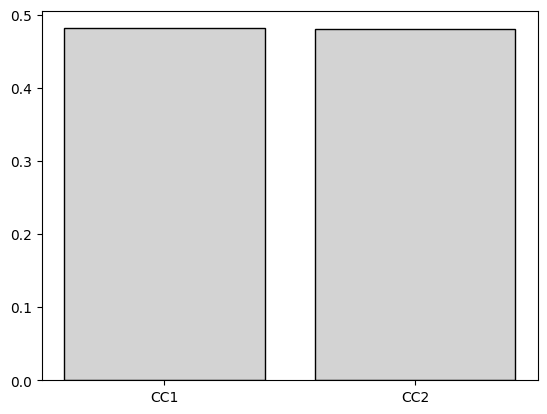

In [11]:
plt.bar(['CC1', 'CC2'], comp_corr, color='lightgrey', width = 0.8, edgecolor='k')

## on umap embed

In [14]:
cca = CCA(n_components=2)
cca.fit(embedding1, embedding2) # Fit the model after UMAP

# Transform the data
A_c, B_c = cca.transform(embedding1, embedding2)

# A_c and B_c are the transformed data in the canonical space
print("Canonical Correlations:")
print(cca.score(embedding1, embedding2))

# Optional: To see the correlation coefficients
corrs = [np.corrcoef(A_c[:, i], B_c[:, i])[0, 1] for i in range(A_c.shape[1])]
print("Correlation Coefficients:", corrs)

Canonical Correlations:
-0.9934121981814538
Correlation Coefficients: [0.0038447374325681206, 0.0021137853358469474]


# corr mat

## plot feature actv corrs

In [ ]:
import matplotlib.pyplot as plt

0.632544421789805


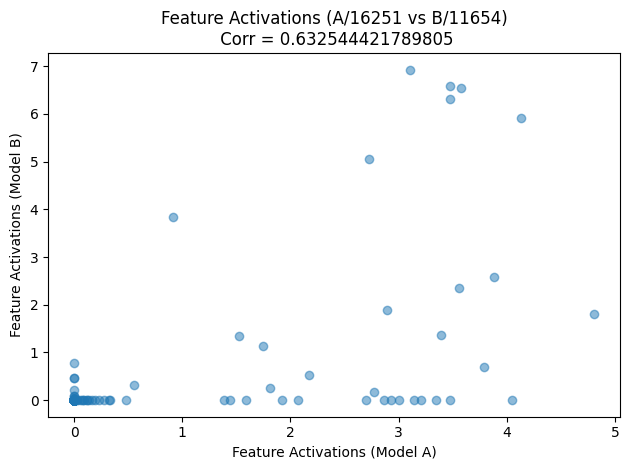

In [ ]:
model_A_f_ind = 11654
model_B_f_ind = 3103

feature_0_actvs_A = reshaped_activations_A[:, model_A_f_ind].numpy()
feature_0_actvs_B = reshaped_activations_B[:, model_B_f_ind].numpy()

corr = np.corrcoef(feature_0_actvs_A, feature_0_actvs_B)[0, 1]
print(corr)

plt.scatter(feature_0_actvs_A, feature_0_actvs_B, alpha=0.5)

plt.xlabel('Feature Activations (Model A)')
plt.ylabel('Feature Activations (Model B)')
plt.title('Feature Activations (A/16251 vs B/11654)\n Corr = ' + str(corr))

plt.tight_layout()
plt.show()

## get all actv corrs

In [ ]:
import torch
import numpy as np

def top_ind_from_B(ind, reshaped_activations_A, reshaped_activations_B):
    # Select a column from matrix B
    column_A = reshaped_activations_B[:, ind]

    # Ensure tensors are on GPU
    if torch.cuda.is_available():
        reshaped_activations_A = reshaped_activations_A.to('cuda')
        reshaped_activations_B = reshaped_activations_B.to('cuda')
        column_A = column_A.to('cuda')

    # Calculate means and standard deviations
    mean_A = column_A.mean()
    std_A = column_A.std()

    # Mask columns with zero standard deviation
    std_B = reshaped_activations_A.std(dim=0)
    valid_columns_mask = std_B != 0

    # Compute correlations for valid columns
    valid_reshaped_activations_A = reshaped_activations_A[:, valid_columns_mask]
    mean_B = valid_reshaped_activations_A.mean(dim=0)
    std_B = valid_reshaped_activations_A.std(dim=0)

    covariance = ((valid_reshaped_activations_A - mean_B) * (column_A - mean_A).unsqueeze(1)).mean(dim=0)
    correlations = covariance / (std_A * std_B)

    # Fill correlations with -inf where columns were invalid
    all_correlations = torch.full((reshaped_activations_A.shape[1],), float('-inf')).to(correlations.device)
    all_correlations[valid_columns_mask] = correlations

    # Get the indices of the top 10 columns in B with the highest correlations
    top_10_indices = torch.topk(all_correlations, 1).indices.cpu().numpy()
    top_10_correlations = all_correlations[top_10_indices].cpu().numpy()

    return top_10_indices, top_10_correlations

In [ ]:
def find_all_highest_correlations(reshaped_activations_A, reshaped_activations_B):
    # Ensure tensors are on GPU
    if torch.cuda.is_available():
        reshaped_activations_A = reshaped_activations_A.to('cuda')
        reshaped_activations_B = reshaped_activations_B.to('cuda')

    # Normalize columns of A
    mean_A = reshaped_activations_A.mean(dim=0, keepdim=True)
    std_A = reshaped_activations_A.std(dim=0, keepdim=True)
    normalized_A = (reshaped_activations_A - mean_A) / (std_A + 1e-8)  # Avoid division by zero

    # Normalize columns of B
    mean_B = reshaped_activations_B.mean(dim=0, keepdim=True)
    std_B = reshaped_activations_B.std(dim=0, keepdim=True)
    normalized_B = (reshaped_activations_B - mean_B) / (std_B + 1e-8)  # Avoid division by zero

    # Compute correlation matrix
    correlation_matrix = torch.matmul(normalized_A.t(), normalized_B) / normalized_A.shape[0]

    # Handle NaNs by setting them to -inf
    correlation_matrix = torch.where(torch.isnan(correlation_matrix), torch.tensor(float('-inf')).to(correlation_matrix.device), correlation_matrix)

    # Get the highest correlation indices and values
    highest_correlations_values, highest_correlations_indices = correlation_matrix.max(dim=0)

    # Move results back to CPU
    highest_correlations_indices = highest_correlations_indices.cpu().numpy()
    highest_correlations_values = highest_correlations_values.cpu().numpy()

    return highest_correlations_indices, highest_correlations_values

highest_correlations_indices, highest_correlations_values = find_all_highest_correlations(reshaped_activations_A, reshaped_activations_B)
print(f'Highest correlations indices: {highest_correlations_indices}')
print(f'Highest correlations values: {highest_correlations_values}')

Highest correlations indices: [ 5561 15125 14623 ...  8922  1130     0]
Highest correlations values: [0.6188084  0.9358087  0.55872095 ... 0.770677   0.8569331  0.        ]


In [ ]:
highest_correlations_indices[:100]

array([ 5561, 15125, 14623,  8628, 12995, 15964, 12440, 16310,  6360,
        4538,  5225,  8931,     0,  9435,  7193,  9390,  2010, 15595,
        1309,  6360,  9393, 16063,   384,   441, 13982, 14593, 13763,
         560,  4131,  3115, 11445, 16025, 12631,  2658, 16050, 15617,
       14301, 10218,  3316,  4924,  2896,  5917,  5311,  8945, 16219,
       12104, 11352,     0, 12855, 13316, 10460, 14175, 14790,  6012,
           0, 12990,  3639,  7861, 11677,  6964,  8036, 12572,     0,
       12067,  4792,  5505, 10286,   445,   514,  7165, 15249,    24,
           0,  4597,  3918,  9250, 12228, 14177, 10100, 10105,  4695,
        2548,  3076, 12545, 11103, 15131, 11101,  7441,  4950, 12526,
        3007, 13211, 12909, 14446, 10146, 14192,  7380,  9130,     0,
       13100])

### save corrs

In [ ]:
import pickle

In [ ]:
with open('highest_correlations_indices_v1.pkl', 'wb') as f:
    pickle.dump(highest_correlations_indices, f)
with open('highest_correlations_values_v1.pkl', 'wb') as f:
    pickle.dump(highest_correlations_values, f)

In [ ]:
from google.colab import files
files.download('highest_correlations_indices_v1.pkl')
files.download('highest_correlations_values_v1.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# !cp batch_tokens_anySamps_v1.pkl /content/drive/MyDrive/

# load model

In [ ]:
from transformers import AutoTokenizer

# Load the tokenizer for the specified model
tokenizer = AutoTokenizer.from_pretrained("roneneldan/TinyStories-1Layer-21M")

tokenizer_config.json:   0%|          | 0.00/722 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/438 [00:00<?, ?B/s]

{'input_ids': [7454, 2402, 257, 640, 11, 612, 373, 257, 7009, 1621, 13], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [ ]:
# Convert a single string to a token ID
single_string = "example"
token_id = tokenizer.encode(single_string, add_special_tokens=False)[0]
decoded_string = tokenizer.decode([token_id])
print(decoded_string)

example


# interpret paired features

## load dataset tokens

In [ ]:
import pickle
file_path = '/content/drive/MyDrive/batch_tokens_anySamps_v1.pkl'
with open(file_path, 'rb') as f:
    batch_tokens = pickle.load(f)

## interpret

In [ ]:
%pip install jaxtyping

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 2.0 MB/s eta 0:00:00


In [ ]:
import torch
from torch import nn, Tensor
from jaxtyping import Float, Int
from typing import Optional, Callable, Union, List, Tuple

In [ ]:
def highest_activating_tokens(
    feature_acts,
    feature_idx: int,
    k: int = 10,  # num batch_seq samples
    batch_tokens=None
) -> Tuple[Int[Tensor, "k 2"], Float[Tensor, "k"]]:
    '''
    Returns the indices & values for the highest-activating tokens in the given batch of data.
    '''
    batch_size, seq_len = batch_tokens.shape

    # Get the top k largest activations for only targeted feature
    # need to flatten (batch,seq) into batch*seq first because it's ANY batch_seq, even if in same batch or same pos
    flattened_feature_acts = feature_acts[:, :, feature_idx].reshape(-1)

    top_acts_values, top_acts_indices = flattened_feature_acts.topk(k)
    # top_acts_values should be 1D
    # top_acts_indices should be also be 1D. Now, turn it back to 2D
    # Convert the indices into (batch, seq) indices
    top_acts_batch = top_acts_indices // seq_len
    top_acts_seq = top_acts_indices % seq_len

    return torch.stack([top_acts_batch, top_acts_seq], dim=-1), top_acts_values

In [ ]:
from rich import print as rprint
def display_top_sequences(top_acts_indices, top_acts_values, batch_tokens):
    s = ""
    for (batch_idx, seq_idx), value in zip(top_acts_indices, top_acts_values):
        # s += f'{batch_idx}\n'
        s += f'batchID: {batch_idx}, '
        # Get the sequence as a string (with some padding on either side of our sequence)
        seq_start = max(seq_idx - 5, 0)
        seq_end = min(seq_idx + 5, batch_tokens.shape[1])
        seq = ""
        # Loop over the sequence, adding each token to the string (highlighting the token with the large activations)
        for i in range(seq_start, seq_end):
            # new_str_token = model.to_single_str_token(batch_tokens[batch_idx, i].item()).replace("\n", "\\n").replace("<|BOS|>", "|BOS|")
            new_str_token = tokenizer.decode([batch_tokens[batch_idx, i].item()]).replace("\n", "\\n").replace("<|BOS|>", "|BOS|")
            if i == seq_idx:
                new_str_token = f"[bold u dark_orange]{new_str_token}[/]"
            seq += new_str_token
        # Print the sequence, and the activation value
        s += f'Act = {value:.2f}, Seq = "{seq}"\n'

    rprint(s)

In [ ]:
samp_m = 5 # get top samp_m tokens for all top feat_k feature neurons

for feature_idx_B, feature_idx_A in enumerate(highest_correlations_indices[:10]):
    print(f'Correlation: {highest_correlations_values[feature_idx_B]}')
    print('Model A Feature: ', feature_idx_A)
    ds_top_acts_indices, ds_top_acts_values = highest_activating_tokens(feature_acts_model_A, feature_idx_A, samp_m, batch_tokens=batch_tokens)
    display_top_sequences(ds_top_acts_indices, ds_top_acts_values, batch_tokens=batch_tokens)

    print('Model B Feature: ', feature_idx_B)
    ds_top_acts_indices, ds_top_acts_values = highest_activating_tokens(feature_acts_model_B, feature_idx_B, samp_m, batch_tokens=batch_tokens)
    display_top_sequences(ds_top_acts_indices, ds_top_acts_values, batch_tokens=batch_tokens)

    print('-'*50)

Correlation: 0.618808388710022
Model A Feature:  5561


batchID: 306, Act = 1.65, Seq = " soon.Ben and Tom are friends. They like"
batchID: 261, Act = 1.54, Seq = " and the paper. They are not happy. They"
batchID: 354, Act = 1.40, Seq = " lot.\n\nBen is sad too. He"
batchID: 335, Act = 1.30, Seq = "\n\nAnna and Ben are sad and angry."
batchID: 260, Act = 1.29, Seq = " wait for Christmas. They are confused. What should"

Model B Feature:  0


batchID: 309, Act = 3.69, Seq = " at each other. They are still friends. They"
batchID: 257, Act = 3.39, Seq = " and chicken too. They are all good for you"
batchID: 363, Act = 3.35, Seq = " at his ball. He is sad. He cannot"
batchID: 260, Act = 3.21, Seq = "\n\nAnna and Ben are very happy. They"
batchID: 410, Act = 3.20, Seq = " catching the ball. They are having fun.\n"

--------------------------------------------------
Correlation: 0.9358087182044983
Model A Feature:  15125


batchID: 136, Act = 6.29, Seq = ". One day, she was walking in the park"
batchID: 477, Act = 5.96, Seq = ". One day, he was playing with his cards"
batchID: 446, Act = 5.73, Seq = ". One day, Lily was playing in her wardrobe"
batchID: 141, Act = 5.51, Seq = " One day, she was playing with her friends"
batchID: 441, Act = 5.50, Seq = ". One day, Lily was playing outside when the"

Model B Feature:  1


batchID: 141, Act = 5.84, Seq = " One day, she was playing with her friends"
batchID: 82, Act = 5.81, Seq = ". One day, Tom was walking on the street"
batchID: 50, Act = 5.44, Seq = "\nOne day, Mia was very tired. She"
batchID: 477, Act = 5.24, Seq = ". One day, he was playing with his cards"
batchID: 136, Act = 5.21, Seq = ". One day, she was walking in the park"

--------------------------------------------------
Correlation: 0.5587209463119507
Model A Feature:  14623


batchID: 40, Act = 6.42, Seq = " plate. Lily ate them all up and smiled."
batchID: 440, Act = 5.42, Seq = " she had to eat it all or else her mom"
batchID: 23, Act = 4.40, Seq = "I will not eat it all."\n\nTim"
batchID: 348, Act = 4.12, Seq = " of you. You ate all your vegetables. You"
batchID: 23, Act = 4.09, Seq = " you must not eat it all. If you do"

Model B Feature:  2


batchID: 24, Act = 7.96, Seq = " the man. He ate all the candy. Suddenly"
batchID: 348, Act = 7.34, Seq = " of you. You ate all your vegetables. You"
batchID: 233, Act = 7.33, Seq = " was very happy and ate all the corn.\n"
batchID: 451, Act = 6.38, Seq = " sister's toys and eat all the cookies. One"
batchID: 40, Act = 4.95, Seq = " plate. Lily ate them all up and smiled."

--------------------------------------------------
Correlation: 0.293124258518219
Model A Feature:  8628


batchID: 346, Act = 3.35, Seq = " how to have fun. He hoped she would not"
batchID: 423, Act = 2.55, Seq = " would not see her. She was sorry.Once"
batchID: 346, Act = 2.48, Seq = " come and be nice. He hoped she would learn"
batchID: 345, Act = 2.36, Seq = " him to be happy. She did not want to"
batchID: 325, Act = 2.29, Seq = " would like her picture. She helped her mom clean"

Model B Feature:  3


batchID: 263, Act = 0.34, Seq = " why they were different. She examined her toys,"
batchID: 263, Act = 0.29, Seq = " them and ask questions. She wanted to know how"
batchID: 262, Act = 0.28, Seq = " have to say sorry. They tell them that they"
batchID: 300, Act = 0.27, Seq = " know what is inside. They look for a key"
batchID: 298, Act = 0.25, Seq = " know what to say. She looked at Lily and"

--------------------------------------------------
Correlation: 0.8715307712554932
Model A Feature:  12995


batchID: 445, Act = 5.22, Seq = " put on the apron right away. \n"
batchID: 91, Act = 5.10, Seq = " very excited and started drawing right away. She worked"
batchID: 275, Act = 4.47, Seq = " Mom said she would come right away. She told"
batchID: 197, Act = 4.13, Seq = " Timmy wanted to explore right away. He saw"
batchID: 60, Act = 2.48, Seq = " tent was set up just right. \n\n"

Model B Feature:  4


batchID: 197, Act = 7.60, Seq = " Timmy wanted to explore right away. He saw"
batchID: 91, Act = 7.05, Seq = " very excited and started drawing right away. She worked"
batchID: 445, Act = 6.74, Seq = " put on the apron right away. \n"
batchID: 275, Act = 4.00, Seq = " Mom said she would come right away. She told"
batchID: 179, Act = 2.08, Seq = " how to design it just right.\n\nBut"

--------------------------------------------------
Correlation: 0.2184809148311615
Model A Feature:  15964


batchID: 360, Act = 1.42, Seq = " to eat your cake and tea."\n\nL"
batchID: 201, Act = 1.29, Seq = " wash it with soap and water." \n\n"
batchID: 324, Act = 1.02, Seq = " on the table and the floor. We need to"
batchID: 373, Act = 0.96, Seq = " will help you relax and fall asleep."\n\n"
batchID: 27, Act = 0.86, Seq = " let's lie down and rest. Then we can"

Model B Feature:  5


batchID: 74, Act = 1.88, Seq = " up high to try and touch the statue's nose"
batchID: 186, Act = 1.74, Seq = " let's go home and take a nap." "
batchID: 51, Act = 1.74, Seq = "uffy wanted to escape and explore the world outside the"
batchID: 27, Act = 1.72, Seq = " want to lie down and rest."\n\nTim"
batchID: 409, Act = 1.71, Seq = ""Let's go and look," says Tim."

--------------------------------------------------
Correlation: 0.35061749815940857
Model A Feature:  12440


batchID: 480, Act = 2.28, Seq = " a lot. He never saw his daughter again."
batchID: 235, Act = 2.19, Seq = " was very lazy and never wanted to do anything."
batchID: 63, Act = 1.54, Seq = " Sadly, they were never found and the flowers in"
batchID: 447, Act = 1.45, Seq = " the wardrobe and was never seen again.Once upon"
batchID: 54, Act = 1.41, Seq = " he thought he would never see his"

Model B Feature:  6


batchID: 46, Act = 2.12, Seq = " explore and examine everything he saw.\n\nAs"
batchID: 480, Act = 2.02, Seq = " a lot. He never saw his daughter again."
batchID: 249, Act = 1.34, Seq = " asked her where she last saw it. She said"
batchID: 54, Act = 1.26, Seq = " he thought he would never see his"
batchID: 410, Act = 1.08, Seq = ". They see a silly sight.\n\nThey"

--------------------------------------------------
Correlation: 0.8785818219184875
Model A Feature:  16310


batchID: 76, Act = 6.96, Seq = ". And the little girl never forgot how the robot"
batchID: 88, Act = 6.84, Seq = " day on, Timmy never dared Mittens to"
batchID: 425, Act = 6.66, Seq = " day on, the bird never had to refuse"
batchID: 72, Act = 6.26, Seq = " day on, the lion never went to the circus"
batchID: 127, Act = 6.10, Seq = " on, the two fishes never fought again. They"

Model B Feature:  7


batchID: 243, Act = 6.89, Seq = " value of old toys and never disagreed with Timmy"
batchID: 81, Act = 6.32, Seq = " around the toy stove and never touched the burners"
batchID: 55, Act = 6.04, Seq = " to take it easy and never give up when things"
batchID: 255, Act = 5.57, Seq = " stayed on the ground and never flew again.Tom"
batchID: 192, Act = 5.51, Seq = " cup was dependable and never spilled.\n\n"

--------------------------------------------------
Correlation: 0.7482732534408569
Model A Feature:  6360


batchID: 374, Act = 3.72, Seq = " closed his eyes and drifted off to sleep. Mom"
batchID: 85, Act = 3.27, Seq = " And so, they went off to explore the rest"
batchID: 190, Act = 3.22, Seq = " play!" And they ran off to play together."
batchID: 254, Act = 2.78, Seq = ". So, it took off and flew higher and"
batchID: 131, Act = 2.53, Seq = " for dinner, Lily took off the belt and put"

Model B Feature:  8


batchID: 366, Act = 4.89, Seq = "."\n\nThey got off their bikes and left"
batchID: 190, Act = 4.17, Seq = " play!" And they ran off to play together."
batchID: 85, Act = 3.26, Seq = " And so, they went off to explore the rest"
batchID: 374, Act = 3.04, Seq = " closed his eyes and drifted off to sleep. Mom"
batchID: 191, Act = 2.48, Seq = " Sarah. Sarah let Spot off his leash so he"

--------------------------------------------------
Correlation: 0.9201383590698242
Model A Feature:  4538


batchID: 107, Act = 4.13, Seq = " They folded the clothes and then put them in a"
batchID: 106, Act = 3.51, Seq = " clothes in the machine and then put them in the"
batchID: 378, Act = 3.49, Seq = " one more step, and then he heard a loud"
batchID: 48, Act = 2.58, Seq = " the nail all day and then went back to their"
batchID: 333, Act = 2.40, Seq = " one claims the cat, then maybe we can adopt"

Model B Feature:  9


batchID: 378, Act = 8.73, Seq = " one more step, and then he heard a loud"
batchID: 48, Act = 7.36, Seq = " the nail all day and then went back to their"
batchID: 107, Act = 7.22, Seq = " They folded the clothes and then put them in a"
batchID: 487, Act = 7.12, Seq = " it for a moment and then decided to give the"
batchID: 106, Act = 6.34, Seq = " clothes in the machine and then put them in the"

--------------------------------------------------


# search modB features with keyword, get modA f pair

In [23]:
def find_indices_with_keyword(fList, keyword):
    """
    Find all indices of fList which contain the keyword in the string at those indices.

    Args:
    fList (list of str): List of strings to search within.
    keyword (str): Keyword to search for within the strings of fList.

    Returns:
    list of int: List of indices where the keyword is found within the strings of fList.
    """
    return [index for index, string in enumerate(fList) if keyword in string]

def get_values_from_indices(indices, values_list):
    """
    Get the values from values_list at the specified indices.

    Args:
    indices (list of int): List of indices to retrieve values from.
    values_list (list): List of values from which to retrieve the specified indices.

    Returns:
    list: List of values from values_list at the specified indices.
    """
    return [values_list[index] for index in indices]

keyword = "upon"
modB_feats = find_indices_with_keyword(fList_model_B, keyword)
modA_feats = get_values_from_indices(modB_feats, highest_correlations_indices_v1)
print(modA_feats)
print(modB_feats)

[13046, 10947, 2370, 13071, 16325, 10947, 13152, 10947, 10947, 10947, 13046, 10947, 10500, 1112, 10947, 13046, 10947, 10947, 11667, 9915, 3896, 14976, 10947, 8104, 16207, 13077, 10947, 10947, 10947, 340, 16208, 16325, 13046, 10947, 10947, 10947, 10947, 7657, 3140, 10947, 10947, 340, 340, 10947, 1300, 8104, 13152, 16325, 7657, 10929, 10947, 10947, 13046, 10947, 3896, 16325, 13046, 7657, 13046, 10194, 10947, 15034, 7657, 15562, 3077, 16208, 16325, 10947, 3896, 3896, 340, 10947, 11745, 10947, 340, 12319]
[271, 311, 321, 461, 1416, 1468, 2264, 2421, 2732, 3323, 3459, 3610, 3619, 3621, 3786, 3902, 4206, 4581, 4959, 5369, 5535, 5634, 5727, 5944, 6282, 6663, 6747, 6785, 6855, 6925, 6965, 7023, 7094, 7114, 8053, 8121, 8254, 8285, 8357, 8398, 8482, 8502, 8654, 8735, 8908, 9039, 9540, 9624, 9800, 10053, 10112, 10221, 10390, 10784, 10954, 11400, 11901, 11930, 12295, 12970, 13061, 13129, 13484, 13696, 13817, 13894, 14217, 14786, 14915, 15011, 15393, 15548, 15685, 15946, 16182, 16262]


ISSUE WITH SEARCH: ‘king’ appears to be part of ‘talking’, etc

In [56]:
split_list = fList_model_B[0].split(',')
[i.replace(' ', '').lower() for i in split_list]

['are', 'are', 'is', 'are', 'are', '']

In [24]:
def find_indices_with_keyword(fList, keyword):
    """
    Find all indices of fList which contain the keyword in the string at those indices.

    Args:
    fList (list of str): List of strings to search within.
    keyword (str): Keyword to search for within the strings of fList.

    Returns:
    list of int: List of indices where the keyword is found within the strings of fList.
    """
    index_list = []
    for index, string in enumerate(fList):
        split_list = string.split(',')
        no_space_list = [i.replace(' ', '').lower() for i in split_list]
        if keyword in no_space_list:
            index_list.append(index)
    return index_list

In [22]:
keyword = "king"
modB_feats = find_indices_with_keyword(fList_model_B, keyword)
modA_feats = get_values_from_indices(modB_feats, highest_correlations_indices_v1)
print(modA_feats)
print(modB_feats)

[11920, 11222]
[5430, 10868]


In [44]:
print(fList_model_A[11920])
print(fList_model_B[5430])

 monster,  monster,  princess,  princess,  knight, 
 princess,  princess,  princess,  princess,  king, 


In [41]:
keyword = "spot"
modB_feats = find_indices_with_keyword(fList_model_B, keyword)
modA_feats = get_values_from_indices(modB_feats, highest_correlations_indices_v1)
print(modA_feats)
print(modB_feats)

[0, 12104, 0, 0, 0, 0, 2548, 0, 0, 14534, 9409, 0, 9282, 15926, 14668, 8930, 2925, 0, 0, 0, 4364, 7302, 13046, 13595, 0, 0, 0, 15246, 0, 0, 11313, 0, 2567, 0, 0, 0, 5510, 14787, 14126, 0, 0, 0, 13071, 14169, 0, 12638, 0, 0, 0, 748, 0, 0, 0, 0, 2101, 0, 0, 11735, 0, 0, 0, 663, 0, 6748, 0, 0, 0, 0, 15533, 0, 0, 0, 1164, 0, 0, 5477, 1518, 0, 13910, 10664, 0, 2425, 3258, 4589, 0, 15947, 9928, 0, 0, 3216, 13453, 12281, 5835, 11528, 0, 0, 12211, 0, 6665, 13776, 0, 0, 10761, 8671, 0, 8972, 15063, 0, 0, 11133, 14588, 8096, 0, 0, 0, 382, 216, 0, 224, 0, 0, 5376, 7223, 0, 0, 0, 2197, 4835, 4018, 633, 0, 10867, 0, 4770, 0, 0, 0, 0, 0, 0, 6808, 0, 9834, 1689, 0, 14732, 0, 6607, 0, 10594, 0, 12477, 518, 0, 11228, 0, 0, 6249, 836, 9929, 675, 0, 0, 0, 0, 0, 11630, 11528, 7625, 0, 12168, 0, 11040, 0, 0, 0, 0, 10060, 8439, 4130, 8149, 0, 0, 0, 0, 11234, 0, 0, 0, 0, 13720, 0, 135, 7390, 0, 0, 0, 0, 10553, 0, 0, 10789, 0, 0, 13797, 0, 0, 0, 0, 0, 0, 0, 8752, 15246, 4707, 13953, 7563, 0, 0, 0, 0, 0, 0, 16

In [45]:
print(fList_model_A[0])
print(fList_model_B[12])

 both,  they,  Lily,  up,  Tom, 
., Spot,  Spot,  the,  saw, 


# statically color points on 2 plots

In [ ]:
import umap
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

# Create DataFrames for Plotly
df1 = pd.DataFrame(embedding1, columns=['UMAP Component 1', 'UMAP Component 2'])
df1['Feature ID'] = range(len(embedding1))
df1['Feature Description'] = fList_model_A[:len(embedding1)]  # Adjust this if needed
# df1['Color'] = ['yellow' if i in highest_correlations_indices_v1[0:16000] else 'blue' for i in df1['Feature ID']]
df1['Color'] = ['red' if i in modA_feats else 'blue' for i in df1['Feature ID']]

df2 = pd.DataFrame(embedding2, columns=['UMAP Component 1', 'UMAP Component 2'])
df2['Feature ID'] = range(len(embedding2))
df2['Feature Description'] = fList_model_B[:len(embedding2)]  # Adjust this if needed
# df2['Color'] = ['yellow' if i in list(range(16000)) else 'red' for i in df2['Feature ID']]
df2['Color'] = ['red' if i in modB_feats else 'blue' for i in df2['Feature ID']]

# Create side by side plots using Plotly subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=('UMAP Projection of SAE 1', 'UMAP Projection of SAE 2'))

# Add first scatter plot
fig.add_trace(
    go.Scatter(
        x=df1['UMAP Component 1'], y=df1['UMAP Component 2'],
        mode='markers', marker=dict(color=df1['Color']),
        text=df1['Feature ID'], customdata=np.array(df1[['Feature Description']]),
        hovertemplate='<b>Feature ID:</b> %{text}<br><b>Description:</b> %{customdata[0]}'
    ),
    row=1, col=1
)

# Add second scatter plot
fig.add_trace(
    go.Scatter(
        x=df2['UMAP Component 1'], y=df2['UMAP Component 2'],
        mode='markers', marker=dict(color=df2['Color']),
        text=df2['Feature ID'], customdata=np.array(df2[['Feature Description']]),
        hovertemplate='<b>Feature ID:</b> %{text}<br><b>Description:</b> %{customdata[0]}'
    ),
    row=1, col=2
)

# Update layout
fig.update_layout(
    title_text='UMAP Projections of Feature Decoder Weights',
    xaxis_title='UMAP Component 1',
    yaxis_title='UMAP Component 2',
    showlegend=False
)

fig.show()

Output hidden; open in https://colab.research.google.com to view.

## search and plot fn

In [47]:
import umap
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

def keyword_umaps(keyword, embedding1, embedding2, fList_model_A, fList_model_B, highest_correlations_indices_v1):
    modB_feats = find_indices_with_keyword(fList_model_B, keyword)
    modA_feats = get_values_from_indices(modB_feats, highest_correlations_indices_v1)

    df1 = pd.DataFrame(embedding1, columns=['UMAP Component 1', 'UMAP Component 2'])
    df1['Feature ID'] = range(len(embedding1))
    df1['Feature Description'] = fList_model_A[:len(embedding1)]
    df1['Color'] = ['red' if i in modA_feats else 'blue' for i in df1['Feature ID']]

    df2 = pd.DataFrame(embedding2, columns=['UMAP Component 1', 'UMAP Component 2'])
    df2['Feature ID'] = range(len(embedding2))
    df2['Feature Description'] = fList_model_B[:len(embedding2)]
    df2['Color'] = ['red' if i in modB_feats else 'blue' for i in df2['Feature ID']]

    # Create side by side plots using Plotly subplots
    fig = make_subplots(rows=1, cols=2, subplot_titles=('UMAP Projection of SAE 1', 'UMAP Projection of SAE 2'))

    # Add first scatter plot
    fig.add_trace(
        go.Scatter(
            x=df1['UMAP Component 1'], y=df1['UMAP Component 2'],
            mode='markers', marker=dict(color=df1['Color']),
            text=df1['Feature ID'], customdata=np.array(df1[['Feature Description']]),
            hovertemplate='<b>Feature ID:</b> %{text}<br><b>Description:</b> %{customdata[0]}'
        ),
        row=1, col=1
    )

    # Add second scatter plot
    fig.add_trace(
        go.Scatter(
            x=df2['UMAP Component 1'], y=df2['UMAP Component 2'],
            mode='markers', marker=dict(color=df2['Color']),
            text=df2['Feature ID'], customdata=np.array(df2[['Feature Description']]),
            hovertemplate='<b>Feature ID:</b> %{text}<br><b>Description:</b> %{customdata[0]}'
        ),
        row=1, col=2
    )

    # Update layout
    fig.update_layout(
        title_text='UMAP Projections of Feature Decoder Weights',
        xaxis_title='UMAP Component 1',
        yaxis_title='UMAP Component 2',
        showlegend=False
    )

    fig.show()

In [24]:
keyword = "princess"
keyword_umaps(keyword, embedding1, embedding2, fList_model_A, fList_model_B, highest_correlations_indices_v1)

Output hidden; open in https://colab.research.google.com to view.

## try other keywords

In [25]:
keyword = "let"
keyword_umaps(keyword, embedding1, embedding2, fList_model_A, fList_model_B, highest_correlations_indices_v1)

Output hidden; open in https://colab.research.google.com to view.

In [26]:
keyword = "saw"
keyword_umaps(keyword, embedding1, embedding2, fList_model_A, fList_model_B, highest_correlations_indices_v1)

Output hidden; open in https://colab.research.google.com to view.

In [52]:
keyword = "spot"
keyword_umaps(keyword, embedding1, embedding2, fList_model_A, fList_model_B, highest_correlations_indices_v1)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
print(fList_model_A[0])
print(fList_model_B[12])

In [28]:
keyword = "king"
keyword_umaps(keyword, embedding1, embedding2, fList_model_A, fList_model_B, highest_correlations_indices_v1)

Output hidden; open in https://colab.research.google.com to view.

# cca on feature subset

## directly

In [25]:
keyword = "upon"
modB_feats = find_indices_with_keyword(fList_model_B, keyword)
modA_feats = get_values_from_indices(modB_feats, highest_correlations_indices_v1)
X_subset = weight_matrix_np[modA_feats, :]
Y_subset = weight_matrix_2[modB_feats, :]

In [26]:
n_comp=2 #choose number of canonical variates pairs
cca = CCA(scale=False, n_components=n_comp) #define CCA
cca.fit(X_subset, Y_subset)

# Transform the data
A_c, B_c = cca.transform(X_subset, Y_subset)

comp_corr = [np.corrcoef(A_c[:, i], B_c[:, i])[1][0] for i in range(n_comp)]
comp_corr

[0.9999999999997947, 0.9999999999999886]

### compare to random

In [32]:
rand_modA_feats = np.random.randint(low=0, high=weight_matrix_np.shape[0], size=len(modA_feats)).tolist()
rand_modB_feats = np.random.randint(low=0, high=weight_matrix_2.shape[0], size=len(modB_feats)).tolist()
X_subset = weight_matrix_np[rand_modA_feats, :]
Y_subset = weight_matrix_2[rand_modB_feats, :]

n_comp=2 #choose number of canonical variates pairs
cca = CCA(scale=False, n_components=n_comp) #define CCA
cca.fit(X_subset, Y_subset)

# Transform the data
A_c, B_c = cca.transform(X_subset, Y_subset)

comp_corr = [np.corrcoef(A_c[:, i], B_c[:, i])[1][0] for i in range(n_comp)]
comp_corr

[0.9999999999999998, 0.9999999999999996]

In [33]:
rand_modA_feats = np.random.randint(low=0, high=weight_matrix_np.shape[0], size=len(modA_feats)).tolist()
rand_modB_feats = np.random.randint(low=0, high=weight_matrix_2.shape[0], size=len(modB_feats)).tolist()
X_subset = weight_matrix_np[rand_modA_feats, :]
Y_subset = weight_matrix_2[rand_modB_feats, :]

n_comp=2 #choose number of canonical variates pairs
cca = CCA(scale=False, n_components=n_comp) #define CCA
cca.fit(X_subset, Y_subset)

# Transform the data
A_c, B_c = cca.transform(X_subset, Y_subset)

comp_corr = [np.corrcoef(A_c[:, i], B_c[:, i])[1][0] for i in range(n_comp)]
comp_corr

[1.0, 0.9999999999999991]

In [34]:
len(rand_modA_feats)

76

In [39]:
rand_modA_feats = np.random.randint(low=0, high=weight_matrix_np.shape[0], size=10000).tolist()
rand_modB_feats = np.random.randint(low=0, high=weight_matrix_2.shape[0], size=10000).tolist()
X_subset = weight_matrix_np[rand_modA_feats, :]
Y_subset = weight_matrix_2[rand_modB_feats, :]

n_comp=2 #choose number of canonical variates pairs
cca = CCA(scale=False, n_components=n_comp) #define CCA
cca.fit(X_subset, Y_subset)

# Transform the data
A_c, B_c = cca.transform(X_subset, Y_subset)

comp_corr = [np.corrcoef(A_c[:, i], B_c[:, i])[1][0] for i in range(n_comp)]
comp_corr

/usr/local/lib/python3.10/dist-packages/sklearn/cross_decomposition/_pls.py:110: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


[0.6136825325531577, 0.6048850688668678]

## after umap

In [29]:
keyword = "upon"
modB_feats = find_indices_with_keyword(fList_model_B, keyword)
modA_feats = get_values_from_indices(modB_feats, highest_correlations_indices_v1)
print(modA_feats)
print(modB_feats)

[13046, 10947, 2370, 13071, 16325, 10947, 13152, 10947, 10947, 10947, 13046, 10947, 10500, 1112, 10947, 13046, 10947, 10947, 11667, 9915, 3896, 14976, 10947, 8104, 16207, 13077, 10947, 10947, 10947, 340, 16208, 16325, 13046, 10947, 10947, 10947, 10947, 7657, 3140, 10947, 10947, 340, 340, 10947, 1300, 8104, 13152, 16325, 7657, 10929, 10947, 10947, 13046, 10947, 3896, 16325, 13046, 7657, 13046, 10194, 10947, 15034, 7657, 15562, 3077, 16208, 16325, 10947, 3896, 3896, 340, 10947, 11745, 10947, 340, 12319]
[271, 311, 321, 461, 1416, 1468, 2264, 2421, 2732, 3323, 3459, 3610, 3619, 3621, 3786, 3902, 4206, 4581, 4959, 5369, 5535, 5634, 5727, 5944, 6282, 6663, 6747, 6785, 6855, 6925, 6965, 7023, 7094, 7114, 8053, 8121, 8254, 8285, 8357, 8398, 8482, 8502, 8654, 8735, 8908, 9039, 9540, 9624, 9800, 10053, 10112, 10221, 10390, 10784, 10954, 11400, 11901, 11930, 12295, 12970, 13061, 13129, 13484, 13696, 13817, 13894, 14217, 14786, 14915, 15011, 15393, 15548, 15685, 15946, 16182, 16262]


In [35]:
import numpy as np
import umap
from sklearn.cross_decomposition import CCA

# Assume X and Y are your input matrices of size (16384, 1024)
# Assume indices_X and indices_Y are lists of indices for subsetting X and Y respectively

# Step 1: Subset the matrices
X_subset = weight_matrix_np[modA_feats, :]
Y_subset = weight_matrix_2[modB_feats, :]

# Step 2: Apply UMAP to each subset
# umap_model = umap.UMAP(n_components=2)  # you can adjust n_components as needed
# X_umap = umap_model.fit_transform(X_subset)
# Y_umap = umap_model.fit_transform(Y_subset)
reducer = umap.UMAP(n_neighbors=15, min_dist=0.01, metric='euclidean')
X_umap = reducer.fit_transform(X_subset)
Y_umap = reducer.fit_transform(Y_subset)

# Step 3: Apply CCA to the UMAP-transformed data
cca = CCA(n_components=2)  # you can adjust n_components as needed
X_c, Y_c = cca.fit_transform(X_umap, Y_umap)

# Now X_c and Y_c are the CCA-transformed data
# You can analyze these to find the similarity between the subspaces

# To find the correlation between the CCA components:
correlations = [np.corrcoef(X_c[:, i], Y_c[:, i])[0, 1] for i in range(X_c.shape[1])]
print("Canonical correlations:", correlations)

Canonical correlations: [0.554701142368908, 0.14085489564311693]


In [36]:
# Compute the average canonical correlation score
average_score = np.mean(correlations)
print("Average canonical correlation score:", average_score)

Average canonical correlation score: 0.34777801900601246


In [37]:
print("Canonical Correlations:")
print(cca.score(X_umap, Y_umap))

Canonical Correlations:
-0.715899345562241


In [38]:
print("Canonical Correlations:")
print(cca.score(X_c, Y_c))

Canonical Correlations:
-271.65311761127566


## normalize?

In [39]:
import numpy as np
import umap
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import StandardScaler

# Assuming X and Y are your input matrices of size (16384, 1024)
# Assuming indices_X and indices_Y are lists of indices for subsetting X and Y respectively

# Step 1: Subset the matrices
X_subset = weight_matrix_np[modA_feats, :]
Y_subset = weight_matrix_2[modB_feats, :]

# Step 2: Standardize the subsets
scaler = StandardScaler()
X_subset = scaler.fit_transform(X_subset)
Y_subset = scaler.fit_transform(Y_subset)

# Step 2: Apply UMAP to each subset
# umap_model = umap.UMAP(n_components=2)  # you can adjust n_components as needed
# X_umap = umap_model.fit_transform(X_subset)
# Y_umap = umap_model.fit_transform(Y_subset)
reducer = umap.UMAP(n_neighbors=15, min_dist=0.01, metric='euclidean')
X_umap = reducer.fit_transform(X_subset)
Y_umap = reducer.fit_transform(Y_subset)

# Step 4: Standardize the UMAP-transformed data
X_umap = scaler.fit_transform(X_umap)
Y_umap = scaler.fit_transform(Y_umap)

# Step 5: Fit and transform using CCA
cca = CCA(n_components=2)  # you can adjust n_components as needed
X_c, Y_c = cca.fit_transform(X_umap, Y_umap)

# Step 6: Calculate canonical correlations manually
correlations = [np.corrcoef(X_c[:, i], Y_c[:, i])[0, 1] for i in range(X_c.shape[1])]
print("Canonical correlations:", correlations)

# Calculate the average canonical correlation score manually
average_correlation_score = np.mean(correlations)
print("Average canonical correlation score:", average_correlation_score)

# Step 7: Compute the average canonical correlation score using CCA's score method
cca_score = cca.score(X_umap, Y_umap)
print("CCA score:", cca_score)


Canonical correlations: [0.7215286591407373, 0.29432066066942697]
Average canonical correlation score: 0.5079246599050822
CCA score: -0.14228609916701862


## turn into fn

In [40]:
# def cca_subspace(keyword):
def cca_subspace(keyword):
    modB_feats = find_indices_with_keyword(fList_model_B, keyword)
    modA_feats = get_values_from_indices(modB_feats, highest_correlations_indices_v1)

    # Step 1: Subset the matrices
    X_subset = weight_matrix_np[modA_feats, :]
    Y_subset = weight_matrix_2[modB_feats, :]

    # Step 2: Apply UMAP to each subset
    # umap_model = umap.UMAP(n_components=2)  # you can adjust n_components as needed
    # X_umap = umap_model.fit_transform(X_subset)
    # Y_umap = umap_model.fit_transform(Y_subset)
    reducer = umap.UMAP(n_neighbors=15, min_dist=0.01, metric='euclidean')
    X_umap = reducer.fit_transform(X_subset)
    Y_umap = reducer.fit_transform(Y_subset)

    # Step 3: Apply CCA to the UMAP-transformed data
    cca = CCA(n_components=2)  # you can adjust n_components as needed
    X_c, Y_c = cca.fit_transform(X_umap, Y_umap) # Now X_c and Y_c are the CCA-transformed data

    print("Canonical Correlations:")
    print(cca.score(X_umap, Y_umap))

    # To find the correlation between the CCA components:
    correlations = [np.corrcoef(X_c[:, i], Y_c[:, i])[0, 1] for i in range(X_c.shape[1])]
    print("Canonical correlations:", correlations)

In [41]:
keyword = "let"
cca_subspace(keyword)

Canonical Correlations:
-0.6298193882529746
Canonical correlations: [0.6621195782688294, 0.12758369889665544]


In [42]:
keyword = "saw"
cca_subspace(keyword)

Canonical Correlations:
-0.11550558856260618
Canonical correlations: [0.4495038432504255, 0.032536544932921845]


In [43]:
keyword = "king"
cca_subspace(keyword)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning:

n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:134: UserWarning:

A large number of your vertices were disconnected from the manifold.
Disconnection_distance = inf has removed 0 edges.
It has fully disconnected 2 vertices.
You might consider using find_disconnected_points() to find and remove these points from your data.
Use umap.utils.disconnected_vertices() to identify them.



ValueError: zero-size array to reduction operation maximum which has no identity

In [44]:
keyword = "dragon"
cca_subspace(keyword)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning:

n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning:

n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1



Canonical Correlations:
0.26322183319730597
Canonical correlations: [0.8531651517548868, 0.36222390581057756]


In [46]:
keyword = "he"
cca_subspace(keyword)

Canonical Correlations:
-0.6993229158042129
Canonical correlations: [0.29147474355979003, 0.06510461511000148]


In [47]:
keyword = "she"
cca_subspace(keyword)

Canonical Correlations:
-0.279651844770926
Canonical correlations: [0.6433882866203232, 0.027875534713209006]
